# Oil v. Gold Comparison

You want to compare the monthly closing price of gold v. oil over the past decade.

The easiest way to uncover a pattern will be to line graph the data

The data can be [found here](https://drive.google.com/file/d/122tdS2eTZEq9q7bbKEZMf6168Vi8biRh/view?usp=share_link).



 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv("data/oil-v-gold.csv")
df_raw

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 2,CL1 Comdty (Oil),Unnamed: 4
0,Date,PX_LAST,NaN,Date,PX_LAST
1,1/31/2008,922.7,NaN,1/31/2008,91.75
2,2/29/2008,975,NaN,2/29/2008,101.84
3,3/31/2008,916.2,NaN,3/31/2008,101.58
4,4/30/2008,865.1,NaN,4/30/2008,113.46
...,...,...,...,...,...
117,9/29/2017,1281.5,NaN,9/29/2017,51.67
118,10/31/2017,1270.5,NaN,10/31/2017,54.38
119,11/30/2017,1273.2,NaN,11/30/2017,57.4
120,12/29/2017,1309.3,NaN,12/29/2017,60.42


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GC1 Comdty (Gold)  122 non-null    object 
 1   Unnamed: 1         122 non-null    object 
 2   Unnamed: 2         0 non-null      float64
 3   CL1 Comdty (Oil)   122 non-null    object 
 4   Unnamed: 4         122 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


## What is our approach? (pseudocoding)

### Fix it
### drop duplicate and nan values
### convert object into floating point numbers
### drop column names, provide sensical
### rename gold and oil columns

In [4]:
df_raw.columns

Index(['GC1 Comdty (Gold)', 'Unnamed: 1', 'Unnamed: 2', 'CL1 Comdty (Oil)',
       'Unnamed: 4'],
      dtype='object')

In [5]:
df = df_raw[['GC1 Comdty (Gold)', 'Unnamed: 1',
       'Unnamed: 4']]
df

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 4
0,Date,PX_LAST,PX_LAST
1,1/31/2008,922.7,91.75
2,2/29/2008,975,101.84
3,3/31/2008,916.2,101.58
4,4/30/2008,865.1,113.46
...,...,...,...
117,9/29/2017,1281.5,51.67
118,10/31/2017,1270.5,54.38
119,11/30/2017,1273.2,57.4
120,12/29/2017,1309.3,60.42


In [6]:
df.columns = ["closing_date", "px_gold", "px_oil"]
df

,closing_date,px_gold,px_oil
0,Date,PX_LAST,PX_LAST
1,1/31/2008,922.7,91.75
2,2/29/2008,975,101.84
3,3/31/2008,916.2,101.58
4,4/30/2008,865.1,113.46
...,...,...,...
117,9/29/2017,1281.5,51.67
118,10/31/2017,1270.5,54.38
119,11/30/2017,1273.2,57.4
120,12/29/2017,1309.3,60.42


In [7]:
## delete top row
## reset index
df = df.drop(0).reset_index(drop = True)
df

,closing_date,px_gold,px_oil
0,1/31/2008,922.7,91.75
1,2/29/2008,975,101.84
2,3/31/2008,916.2,101.58
3,4/30/2008,865.1,113.46
4,5/30/2008,887.3,127.35
...,...,...,...
116,9/29/2017,1281.5,51.67
117,10/31/2017,1270.5,54.38
118,11/30/2017,1273.2,57.4
119,12/29/2017,1309.3,60.42


In [13]:
## convert to floating point numbers
df["px_gold"] = pd.to_numeric(df["px_gold"], errors = "coerce")
df["px_oil"] = pd.to_numeric(df["px_oil"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   closing_date  121 non-null    object 
 1   px_gold       121 non-null    float64
 2   px_oil        121 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [32]:
df["index_gold"] = df["px_gold"] / df["px_gold"].iat[0]*100
df["index_oil"] = df["px_oil"] / df["px_oil"].iat[0]*100
df["gold_pct_change"] = (df["px_gold"] / df["px_gold"].iat[0]-1)*100
df["oil_pct_change"] = (df["px_oil"] / df["px_oil"].iat[0]-1)*100

In [33]:
df

,closing_date,px_gold,px_oil,index_gold,index_oil,gold_pct_change,oil_pct_change
0,1/31/2008,922.7,91.75,100.000000,100.000000,0.000000,0.000000
1,2/29/2008,975.0,101.84,105.668148,110.997275,5.668148,10.997275
2,3/31/2008,916.2,101.58,99.295546,110.713896,-0.704454,10.713896
3,4/30/2008,865.1,113.46,93.757451,123.662125,-6.242549,23.662125
4,5/30/2008,887.3,127.35,96.163433,138.801090,-3.836567,38.801090
...,...,...,...,...,...,...,...
116,9/29/2017,1281.5,51.67,138.885878,56.316076,38.885878,-43.683924
117,10/31/2017,1270.5,54.38,137.693725,59.269755,37.693725,-40.730245
118,11/30/2017,1273.2,57.40,137.986344,62.561308,37.986344,-37.438692
119,12/29/2017,1309.3,60.42,141.898775,65.852861,41.898775,-34.147139


In [29]:
#Export to CSV
df.to_csv("data/oil-v-gold-export.csv", index = False, encoding = "UTF8")

<AxesSubplot:xlabel='closing_date'>

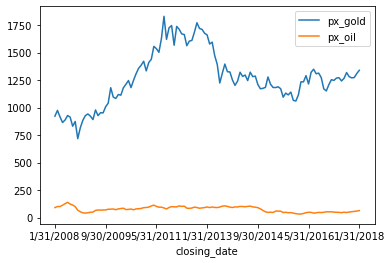

In [30]:
# Create a graphic
df.plot(x="closing_date",
       y=["px_gold", "px_oil"])

<AxesSubplot:xlabel='closing_date'>

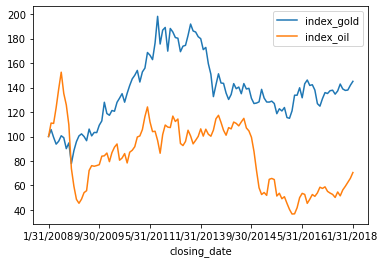

In [31]:
# Create a graphic
df.plot(x="closing_date",
       y=["index_gold", "index_oil"])

<AxesSubplot:title={'center':'Gold v. Oil Over Time'}, xlabel='closing_date'>

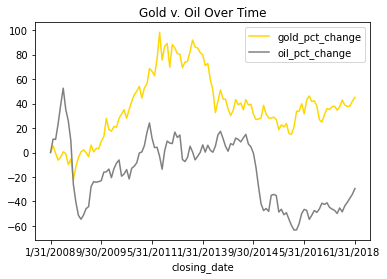

In [43]:
# Create a graphic
df.plot(x="closing_date",
       y=["gold_pct_change", "oil_pct_change"],
       title = "Gold v. Oil Over Time",
       style = {"oil_pct_change":"gray",
               "gold_pct_change":"gold"})